In [52]:
#데이터 핸들링 라이브러리
import pandas as pd
import numpy as np
#데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.family':'AppleGothic'})
mpl.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [53]:
import keras

In [54]:
import tensorflow

In [55]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [56]:
train_images.shape

(60000, 28, 28)

In [57]:
from keras import models
from keras import layers

networks= models.Sequential()
networks.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
networks.add(layers.Dense(10,activation='softmax'))

In [58]:
networks.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [59]:
#이미지 데이터 준비하기
train_images = train_images.reshape((60000,28*28))
train_images= train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images= test_images.astype('float32')/255


In [60]:
from keras.utils import to_categorical

train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)
networks.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
  7/469 [..............................] - ETA: 4s - loss: 1.4279 - accuracy: 0.5513  

2022-08-11 00:24:15.948715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 7ms/step - loss: 0.2544 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1024 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0673 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0487 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0369 - accuracy: 0.9889


In [61]:
test_loss, test_acc= networks.evaluate(test_images,test_labels)
print('test_acc',test_acc)
#test_acc 0.9806000590324402

 29/313 [=>............................] - ETA: 1s - loss: 0.0579 - accuracy: 0.9795

2022-08-11 00:24:33.734988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0667 - accuracy: 0.9801
test_acc 0.9801000356674194


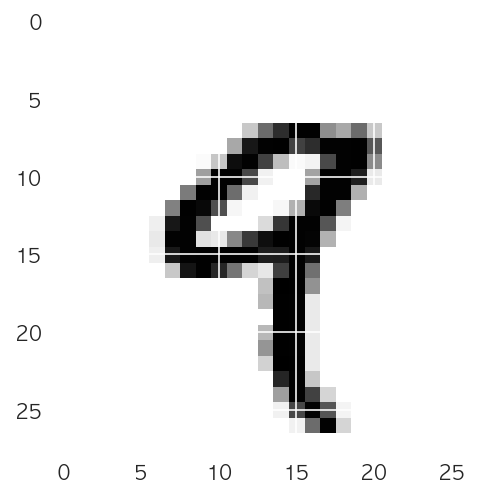

In [62]:
from keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels)= mnist.load_data()

digit= train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [63]:
def naive_relu(x):
    assert len(x.shape) == 2

    x= x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]= max([i,j],0)
    return x

def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x= x.copy()
    for i in rnage(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x



In [64]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)


In [65]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [66]:
word_index= imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)


In [67]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [68]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

X_train= vectorize_sequences(train_data)
X_test= vectorize_sequences(test_data)
y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')


In [69]:
# 신경망 모델 만들기
#output= relu(dot(W,input)+b)

from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [70]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics='accuracy'
              )

X_val= X_train[:10000]
partial_X_train= X_train[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]


In [71]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')

history=model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
 1/30 [>.............................] - ETA: 10s - loss: 0.6910 - acc: 0.5371

2022-08-11 00:24:40.393169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.5014 - acc: 0.7831 - val_loss: 0.3796 - val_acc: 0.8614
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3554 - acc: 0.8809

2022-08-11 00:24:41.485793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 18ms/step - loss: 0.2935 - acc: 0.9051 - val_loss: 0.3086 - val_acc: 0.8799
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2163 - acc: 0.9284 - val_loss: 0.2787 - val_acc: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1670 - acc: 0.9465 - val_loss: 0.2848 - val_acc: 0.8844
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1357 - acc: 0.9561 - val_loss: 0.2912 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1136 - acc: 0.9648 - val_loss: 0.3081 - val_acc: 0.8821
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0911 - acc: 0.9732 - val_loss: 0.3316 - val_acc: 0.8810
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0758 - acc: 0.9793 - val_loss: 0.3444 - val_acc: 0.8809
Epoch 9/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0605 - acc: 0.9845 

In [72]:
history_dict= history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

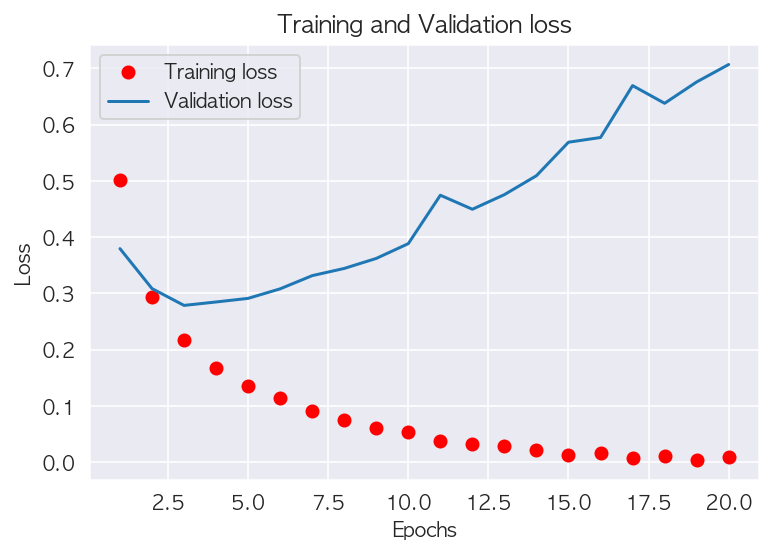

In [73]:
#훈련과 검증 정확도 그리기
history_dict= history.history
loss= history_dict['loss']
val_loss= history_dict['val_loss']

epochs= range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

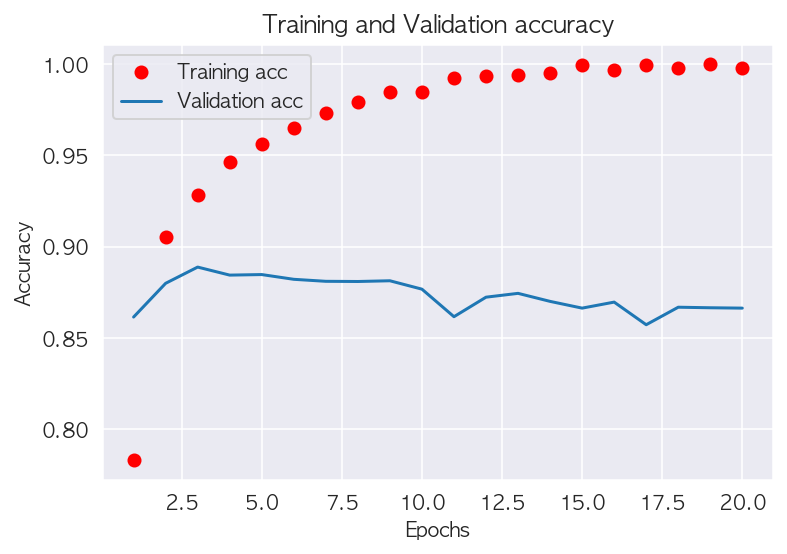

In [74]:
plt.clf()
acc= history_dict['acc']
val_acc= history_dict['val_acc']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
mdoel= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy'
              )
model.fit(X_train,y_train,epochs=4,batch_size=512)
results= model.evaluate(X_test,y_test)

Epoch 1/4


2022-08-11 00:30:39.679452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 2s 16ms/step - loss: 0.6515 - accuracy: 0.9365
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5843 - accuracy: 0.9596
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5097 - accuracy: 0.9673
Epoch 4/4
 23/782 [..............................] - ETA: 3s - loss: 0.4758 - accuracy: 0.8587

2022-08-11 00:30:43.922912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.4732 - accuracy: 0.8600


In [76]:
model.predict(X_test)

 53/782 [=>............................] - ETA: 2s

2022-08-11 00:31:09.266501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step


array([[0.2991282 ],
       [0.6961146 ],
       [0.6950122 ],
       ...,
       [0.2991352 ],
       [0.2991201 ],
       [0.34962648]], dtype=float32)

In [78]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [80]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [81]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [82]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


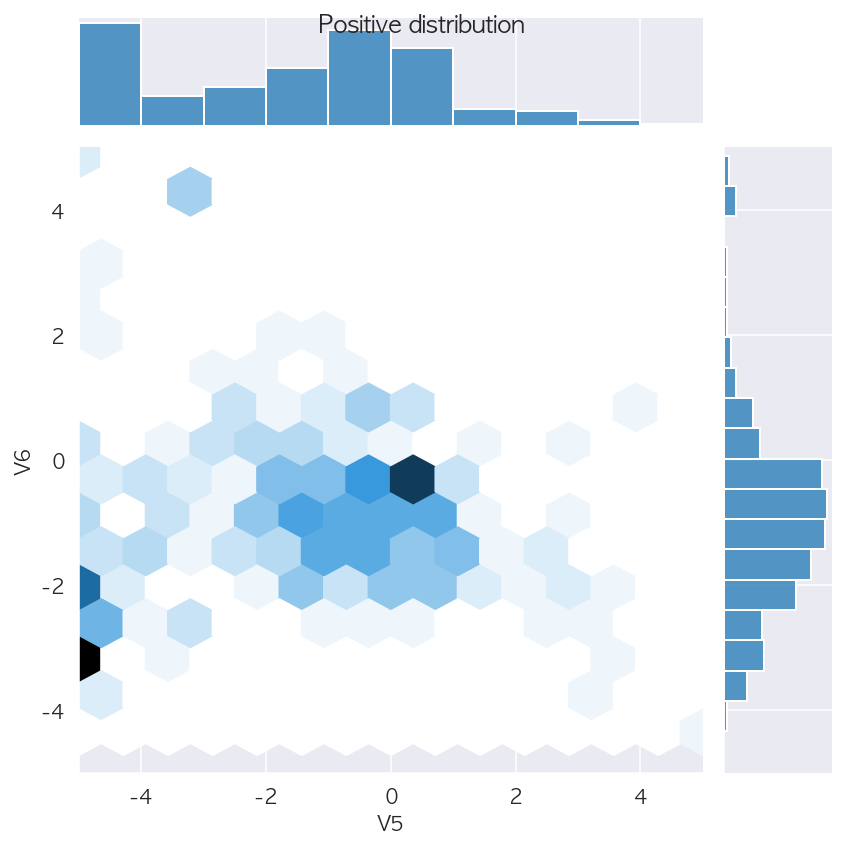

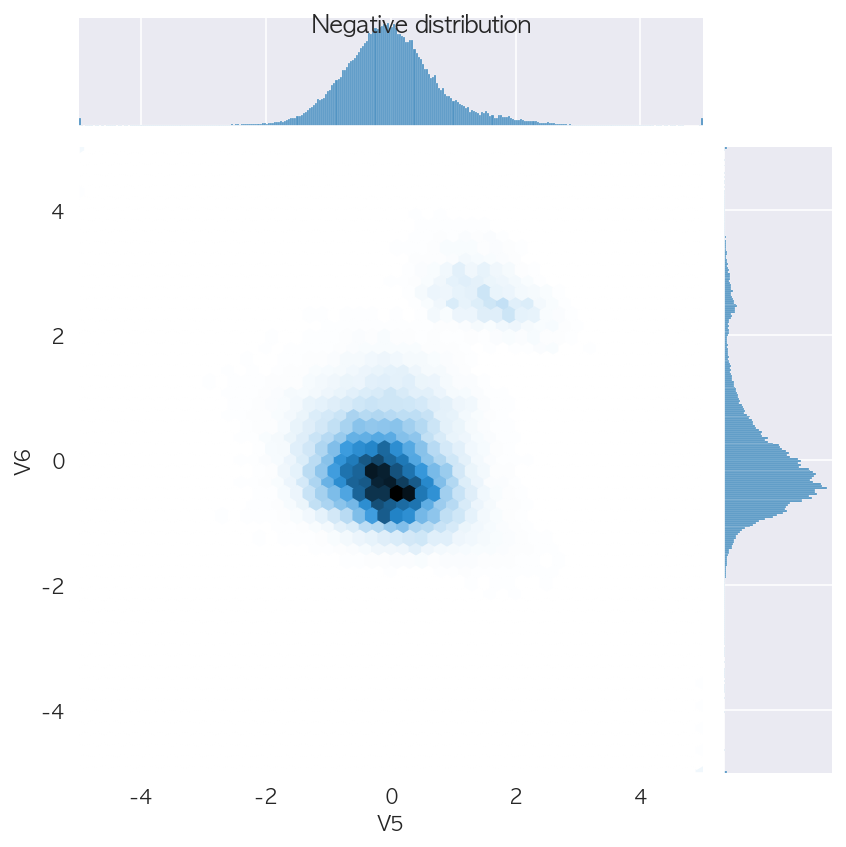

In [83]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [84]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(
            16, activation='relu',
            input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                           bias_initializer=output_bias),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [85]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model = make_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                480       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
                 color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch, history.history['val_loss'],
                 color=colors[n], label='Val '+label,
                 linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

2022-08-11 10:08:42.377133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-11 10:08:47.505161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))